# Preprocessing & Modeling

### Table of Contents
- [Introduction](#Introduction)
- [Proprocessing](#Preprocessing)
- [Modeling](#Modeling)
  - [Modeling with Dataset 1](#Modeling-with-Dataset-1)
  - [Modeling with Dataset 2](#Modeling-with-Dataset-2)
- [Results](#Results)
- [Appendix A: Image Augmentation with fastai](#Appendix:-A-Image-Augmentation-with-fastai)
- [Appendix B: Restarting the Notebook](#Appendix-B:-restarting-the-notebook)

In [1]:
#gdown is for importing data from Google Drive
!pip install gdown -Uqq

In [2]:
from fastai.vision.all import *
import shutil
from pathlib import Path
import zipfile

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
#image of ConvNeXt architecture
!gdown 1cGwwGP3evvhKGNUFld0MSDqUbDf4mhyr

Downloading...
From: https://drive.google.com/uc?id=1cGwwGP3evvhKGNUFld0MSDqUbDf4mhyr
To: /kaggle/working/conv.png
100%|█████████████████████████████████████████| 226k/226k [00:00<00:00, 730kB/s]


In [25]:
ls

conv.png  cstore_images_v3.zip  dataset1_train/  dataset2_train/  dataset_test/


# Introduction

In this notebook we commence the modeling step of the Data Science Pipeline. The data was wrangled with in the previous notbook [EDA & Wrangling](https://github.com/dennis-francis/Springboard/blob/main/Capstone%203%20EDA%20and%20Wrangling%20Retail%20Photos.ipynb). The image augmentation applied in the previous notebook was: 1) randomly recroping parts of the images 2) flipping the images. The fastai library also provides additional image augmentation which is explored in the appendix.

## The Data & the Models used

Two datasets "dataset1_train" and "dataset2_train" and converted into PyTorch <code>Dataloaders</code> as "dls_1" and "dls_2", respectively. Three models are tested: ResNet50, ConvNeXt, and ViT. Model performance for both datasets "dls_1" and "dls_2" are ranked against a third testing dataset "dataset_test" containing 309 images. The testing dataset is preprocessed the same way as datasets 1 & 2, by passing it to fastai's <code>DataBlock()</code> class which tells fastai how to label the data and resizes the image to 224x224.

### "Dataset 1" and "Dataset 2"

"dataset1_train" contains 759 images. The images are taken directly from web scraping images from the dickduckgo search engine, the code can be found here: [EDA & Wrangling](https://github.com/dennis-francis/Springboard/blob/main/Capstone%203%20EDA%20and%20Wrangling%20Retail%20Photos.ipynb). This dataset is somewhat "noisy" due to the scappy nature of web scraping. We hypothesis that this dataset will do poorly, but it could serve as a baseline.

"dataset2_train contains 1321 images. This dataset takes the best images from dataset1_train and removed some images that were irrelevant or could potentially confuse the model. Some domain knowledge of merchandising and some common sense were applied here by the curator of the dataset. In addition, the images were flipped and cropped. The creator of the dataset also went into the neighborhood and snapped photos of merchandise and those were added.

Taking into consideration the 309 test images that are completely held out of the training process, we have a train/test split of:
dataset1_train: 0.29
dataset2_train: 0.19

### The Models

##### ResNet50
A model that is included with the fastai.vision library that is a classic well regarded architecture using deep convolutional neural networks from the paper [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) Kaiming He et.al. It is well cited and used in many papers. Here, we use it as a baseline model. 

##### ConvNeXt
The ConvNeXt model employs only Convolutions, taking image inputs of 224x224 and uses a kernel size of 7x7 as shown in the figure below. Introduced in the paper "A ConvNet Model for the 2020s" by Zhuang Liu et. al., the model can be found here: https://huggingface.co/facebook/convnext-tiny-224. The goal of the paper was to "modernize" the classic ResNet arhitecture, and match the performance of ViT (Vision Transformer) models, in this case the Swin Transformer.

"*In this work, we reexamine the design spaces and test the limits of
what a pure ConvNet can achieve. We gradually “modernize”
a standard ResNet toward the design of a vision Transformer... The outcome of this
exploration is a family of pure ConvNet models dubbed ConvNeXt
-Liu et. al.*"

<img src="conv.png" alt="ConvNeXt architecture" width="600"/>

##### ViT
ViT vision transformer model, that is regarded as "state-of-the-art". It was originally released the the [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) Dosovitskiy et. al. The model is essentially takes the Transformer architecture used in NLP and adapts it to handle computer vision tasks. The model and the weights themselves were downloaded from the PyTorch Image Library [timm](https://github.com/huggingface/pytorch-image-models) by Wightman.

### how many images are in each of the categories?
The following code blocks display how many images are in each dependent variable class. The dependent variable calsses are listed in alphabetical order "candy", "chips", "cigarettes", "drinks", "ice cream", and "other".

In [38]:
# dataset2_train
fns1 = get_image_files(dataset_1_train)
print("dataset1_train contains", len(fns1), "files")

dataset1_train contains 759 files


In [39]:
# Count categories
category_counts = {}

for file_path in fns1:
    category = file_path.parent.name
    category_counts[category] = category_counts.get(category, 0) + 1

print('dataset1_train: \n')
# Print category counts
for category, count in category_counts.items():
    print(f'{category}: {count} images')

dataset1_train: 

cigarettes: 133 images
candy: 120 images
drinks: 125 images
ice cream: 113 images
other: 152 images
chips: 116 images


In [36]:
# dataset2_train
fns2 = get_image_files(dataset_2_train)
print("dataset2_train contains", len(fns2), "files")

dataset2_train contains 1321 files


In [33]:
# Count categories
category_counts = {}

for file_path in fns2:
    category = file_path.parent.name
    category_counts[category] = category_counts.get(category, 0) + 1

# Print category counts
print('dataset2_train: \n')
for category, count in category_counts.items():
    print(f'{category}: {count} images')

dataset2_train: 

cigarettes: 214 images
candy: 234 images
drinks: 222 images
ice cream: 221 images
other: 226 images
chips: 204 images


In [24]:
print("Number of images in test data: ", len(fns_train))

Number of images in test data:  309


In [40]:
# Count categories
category_counts = {}

for file_path in fns_train:
    category = file_path.parent.name
    category_counts[category] = category_counts.get(category, 0) + 1

print('dataset_test: \n')
# Print category counts
for category, count in category_counts.items():
    print(f'{category}: {count} images')

dataset_test: 

cigarettes: 46 images
candy: 50 images
drinks: 50 images
ice cream: 56 images
other: 57 images
chips: 50 images


# Preprocessing

The data is imported from Google Drive using the "gdown" tool. This is a convenient way to get data into jupyter notebook environments such as Kaggle, Paperspace Gradient, Colab.

We then fire up the fastai class, a Python library built on top of PyTorch for Deep Learning. In PyTorch, neural network models expect tuples of (independent, dependent) variables organized in batches. In order to do this, we pass the files to <code>DataLoaders</code> which is a fastai class that does this for us. <code>DataLoaders</code> obtains the dependent variable lables from the <code>get_y</code> parameter, which lets fastai know that the images are labeled according to the parent directory they are located in. Images are resized to 224x224.
```
cstore = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))
```

In [5]:
#import data
!gdown 1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j
From (redirected): https://drive.google.com/uc?id=1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j&confirm=t&uuid=8600aedb-7661-4fce-82ba-d35d614cba35
To: /kaggle/working/cstore_images_v3.zip
100%|█████████████████████████████████████████| 556M/556M [00:05<00:00, 108MB/s]


In [6]:
#unzip the file
with zipfile.ZipFile('/kaggle/working/cstore_images_v3.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working')

In [42]:
#get all of the image files in `path`
dataset_1_train = Path('dataset1_train')
dataset_2_train = Path('dataset2_train')
dataset_test = Path('dataset_test')
fns1 = get_image_files(dataset_1_train)
fns2 = get_image_files(dataset_2_train)
fns_train = get_image_files(dataset_test)

#show a preview
print(fns1[:3],'\n\n', fns2[:3],'\n\n', fns_train[:3])

[Path('dataset1_train/cigarettes/T.199.png'), Path('dataset1_train/cigarettes/ucts1.jpg'), Path('dataset1_train/cigarettes/_4iyh.jpg')] 

 [Path('dataset2_train/cigarettes/Cigarette Store Display | Dibandingkan copy 4.jpg'), Path('dataset2_train/cigarettes/cropped 500357Cigarette Display Behind A Shop Counter Stock Photo - Alamy.jpg'), Path('dataset2_train/cigarettes/cropped 090736Cigarette Racks & Liquor Sales Displays - Creative Display Works copy 2.jpg')] 

 [Path('dataset_test/cigarettes/Pin on Retail Cigarette Displays.jpg'), Path("dataset_test/cigarettes/Independent retailers find 'new' ways to sell tobacco copy.jpg"), Path("dataset_test/cigarettes/Duty free cigarettes online: Order cigarettes Silk Cut Purple 100's in Smithtown.jpg")]


In [43]:
#display which images files are corrupted 
failed1 = verify_images(fns1)
failed2 = verify_images(fns2)
failed_train = verify_images(fns_train)

# remove the corrupted images
failed1.map(Path.unlink);
failed2.map(Path.unlink);
failed_train.map(Path.unlink)

(#0) []

In [44]:
tst_files = get_image_files("dataset_test")
tst_files

(#309) [Path('dataset_test/cigarettes/Pin on Retail Cigarette Displays.jpg'),Path("dataset_test/cigarettes/Independent retailers find 'new' ways to sell tobacco copy.jpg"),Path("dataset_test/cigarettes/Duty free cigarettes online: Order cigarettes Silk Cut Purple 100's in Smithtown.jpg"),Path('dataset_test/cigarettes/Fla. Senate Backs Bill to Ban Selling E-Cigarettes to Minors - WUFT News.jpg'),Path('dataset_test/cigarettes/Stubbed out: the 21 most iconic cigarette packets of all time - Men.jpg'),Path('dataset_test/cigarettes/Tobacco Racks - Invironments.jpg'),Path("dataset_test/cigarettes/Tobacconist's shop selling rolling tobacco products, cigarettes & cigarette display. Dutch ....jpg"),Path('dataset_test/cigarettes/Wall cigarettes in convenience store hi-res stock photography and images - Alamy.jpg'),Path('dataset_test/cigarettes/Tobaccos all over the world - singapore.jpg'),Path('dataset_test/cigarettes/look into a tobacco shop with a lot of cigarettes, Bonn, Germany Stock Photo, R

In [45]:
# DataBlock configures the processing steps for the model
cstore = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [46]:
#pass the path containing the image files to the DataBlock to create DataLoaders
dls_1 = cstore.dataloaders(dataset_1_train)
dls_2 = cstore.dataloaders(dataset_2_train)
dls_test = dls_1.test_dl(tst_files, with_labels=True)

### previewing the data

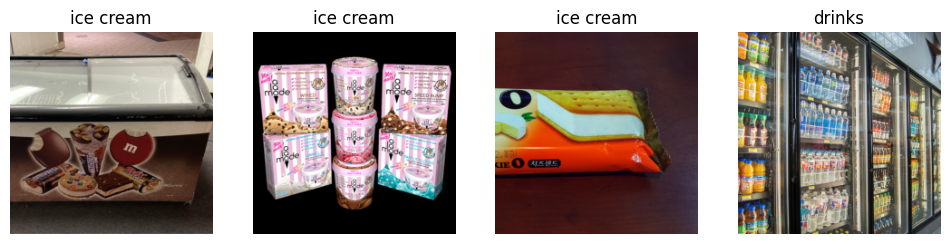

In [47]:
#show a batch of items in the dataset1_train
dls_1.show_batch(max_n=4, nrows=1)

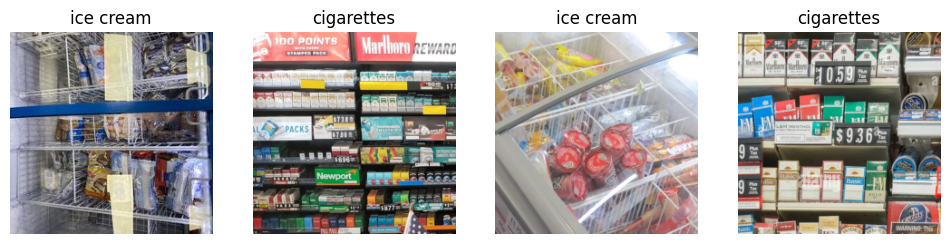

In [48]:
#show a batch of items in the dataset2_train
dls_2.show_batch(max_n=4, nrows=1)

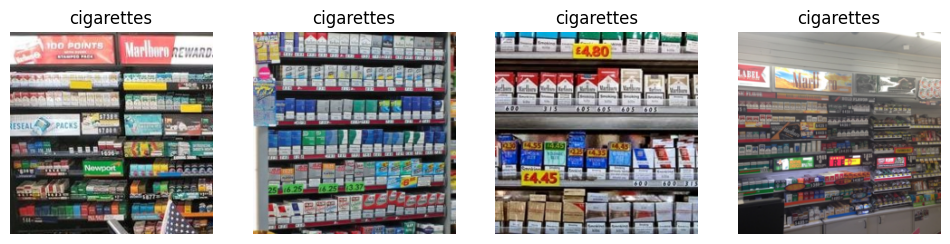

In [49]:
#show a batch of items in the dataset_test
dls_test.show_batch(max_n=4, nrows=1)

# Modeling

## Modeling with Dataset 1

### ResNet50 on Dataset 1

In [50]:
learn = vision_learner(dls_1, resnet50, metrics=accuracy)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 266MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,2.455568,2.098637,0.463576,00:20


epoch,train_loss,valid_loss,accuracy,time
0,1.015895,1.379616,0.609272,00:20
1,0.781519,1.538441,0.622517,00:19
2,0.577489,1.418143,0.635762,00:19


In [51]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.4822)


In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.4822
              precision    recall  f1-score   support

           0       0.65      0.22      0.33        50
           1       1.00      0.26      0.41        50
           2       0.71      0.52      0.60        46
           3       0.92      0.24      0.38        50
           4       0.58      0.66      0.62        56
           5       0.31      0.91      0.46        57

    accuracy                           0.48       309
   macro avg       0.69      0.47      0.47       309
weighted avg       0.68      0.48      0.47       309



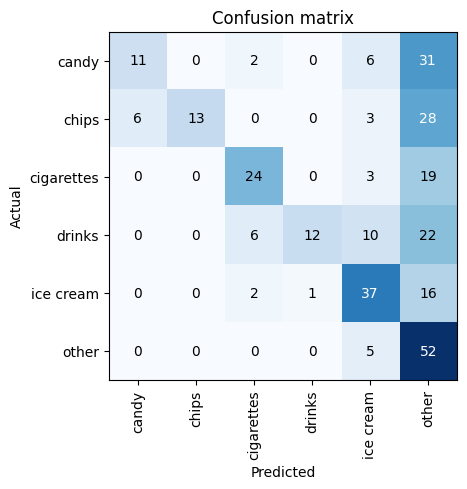

In [53]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

### ConvNeXt on Dataset 1

In [2]:
learn = vision_learner(dls_1, 'convnext_tiny', metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.132458,0.986248,0.655629,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.876550,0.803625,0.761589,00:25
1,0.737519,0.779287,0.768212,00:27
2,0.607513,0.779636,0.761589,00:25


In [3]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.6084)


In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.6084
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        50
           1       0.86      0.64      0.74        50
           2       0.54      0.98      0.69        46
           3       0.87      0.54      0.67        50
           4       0.38      0.09      0.14        56
           5       0.42      0.72      0.53        57

    accuracy                           0.61       309
   macro avg       0.65      0.62      0.59       309
weighted avg       0.64      0.61      0.58       309



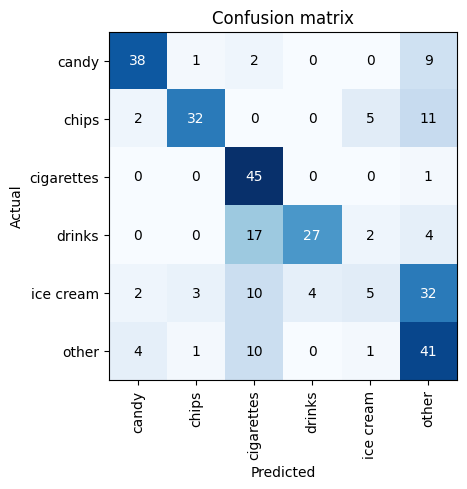

In [5]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

### ViT on Dataset 1

In [3]:
learn = vision_learner(dls_1, 'vit_base_patch16_clip_224', metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.167719,0.573513,0.814570,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.934498,0.568222,0.814570,00:23
1,0.705671,0.498865,0.841060,00:24
2,0.574242,0.500252,0.847682,00:23


In [4]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.8058)


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.8058
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.78      1.00      0.88        50
           2       0.83      0.98      0.90        46
           3       0.85      1.00      0.92        50
           4       1.00      0.36      0.53        56
           5       0.64      0.67      0.66        57

    accuracy                           0.81       309
   macro avg       0.83      0.82      0.79       309
weighted avg       0.83      0.81      0.79       309



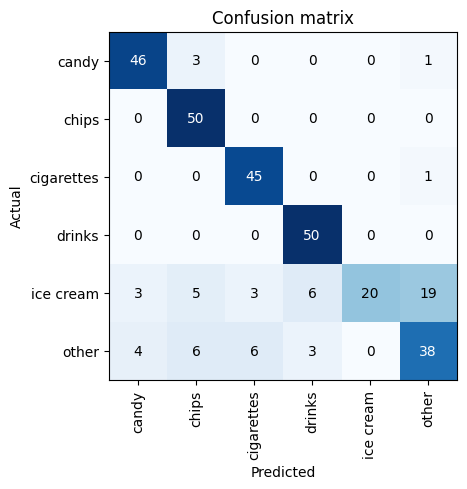

In [6]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

## Modeling with Dataset 2

### ResNet on Dataset 2

In [2]:
learn = vision_learner(dls_2, resnet50, metrics=accuracy)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 238MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.677139,0.588301,0.791667,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.428111,0.379676,0.897727,00:09
1,0.264242,0.311898,0.920455,00:09
2,0.179641,0.251296,0.920455,00:09


In [3]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.3333)


In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.3333
              precision    recall  f1-score   support

           0       0.92      0.22      0.35        50
           1       0.00      0.00      0.00        50
           2       0.64      0.39      0.49        46
           3       0.91      0.20      0.33        50
           4       0.23      1.00      0.38        56
           5       0.44      0.14      0.21        57

    accuracy                           0.33       309
   macro avg       0.52      0.33      0.29       309
weighted avg       0.52      0.33      0.29       309



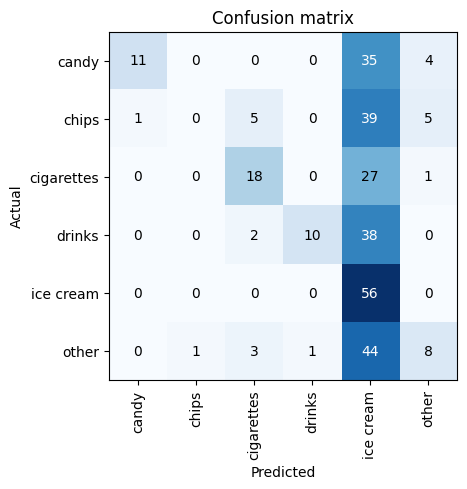

In [5]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

### ConvNeXt on Dataset 2

In [4]:
learn = vision_learner(dls_2, 'convnext_tiny', metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.401970,0.482591,0.840909,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.336295,0.271021,0.912879,00:31
1,0.248938,0.221121,0.912879,00:29
2,0.171034,0.148680,0.935606,00:30
3,0.125549,0.135036,0.946970,00:30


In [5]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.8544)


In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.8544
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.93      0.82      0.87        50
           2       0.82      0.98      0.89        46
           3       1.00      0.80      0.89        50
           4       0.80      0.91      0.85        56
           5       0.84      0.74      0.79        57

    accuracy                           0.85       309
   macro avg       0.87      0.86      0.86       309
weighted avg       0.86      0.85      0.85       309



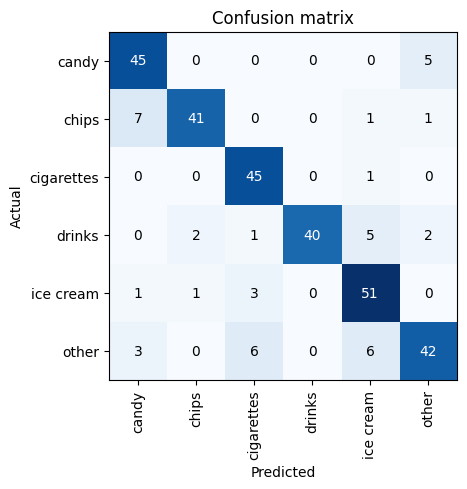

In [7]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

### ViT on Dataset 2

In [2]:
learn = vision_learner(dls_2, 'vit_base_patch16_clip_224', metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.722093,0.380984,0.875000,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.390536,0.213031,0.931818,00:25
1,0.225897,0.158469,0.958333,00:23
2,0.151005,0.156001,0.954545,00:24


In [3]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.9579)


In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.9579
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.94      1.00      0.97        50
           2       0.90      1.00      0.95        46
           3       1.00      0.96      0.98        50
           4       0.98      0.98      0.98        56
           5       0.94      0.89      0.92        57

    accuracy                           0.96       309
   macro avg       0.96      0.96      0.96       309
weighted avg       0.96      0.96      0.96       309



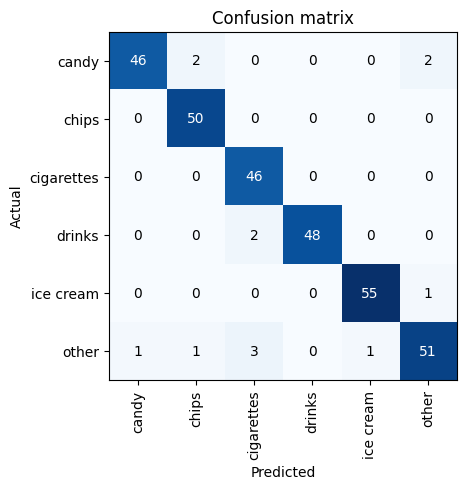

In [5]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

# Results

In [21]:
results = pd.DataFrame({"model":['resnet50','convnext','vit'],
               "dataset 1":[0.47,0.59,0.79],
               "dataset 2":[0.29,0.86, 0.96]})

results

,model,dataset 1,dataset 2
0,resnet50,0.47,0.29
1,convnext,0.59,0.86
2,vit,0.79,0.96


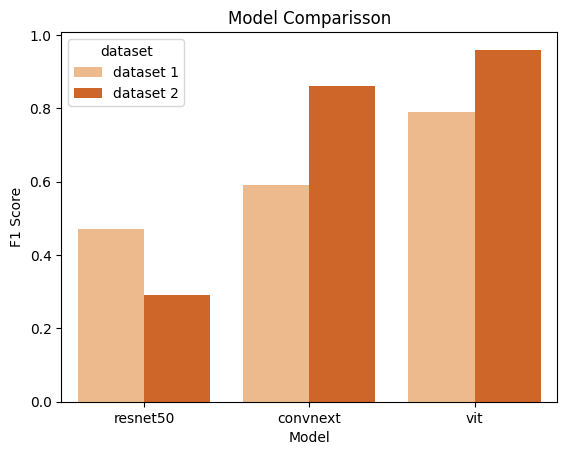

In [22]:
import seaborn as sns
results_melted = results.melt(id_vars="model", var_name="dataset", value_name="accuracy")

# Create a bar plot
sns.barplot(x="model", y="accuracy", hue="dataset", data=results_melted, palette="Oranges")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Model Comparisson")

# Show the plot
plt.show()

The ViT model outperforms the other two models on both datasets. It was able to perform surprisingly well on dataset 1, which contains somewhat messy and dirty data. Resnet performed very poorly and is not well suited for the task at hand. Convnext does well when presented with a well organized and clean set of images that are in dataset 2.

# Appendix: A Image Augmentation with fastai

## Data Augmentation

Providing the model with minor variations of the images can improve model performance by giving it more examples to learn from. Trasformations such as flipping, rotating, perspective warping, and brightness and color contrast changes are applied using the "aug_transforms" function from fastai. Images are augmented during each batch on each epoch. <em>The test data set remains unchanged, as the augmentations are only applied to the training dataset</em>.

![img](https://github.com/dennis-francis/Springboard/blob/main/Screen%20Shot%202023-11-09%20at%209.59.07%20AM.png?raw=true)

In [2]:
cstore = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1)
)

#pass the path containing the image files to the DataBlock to create DataLoaders
dls_1 = cstore.dataloaders(dataset_1_train)
dls_2 = cstore.dataloaders(dataset_2_train)
dls_test = dls_1.test_dl(tst_files, with_labels=True, aug_transforms=aug_transforms())

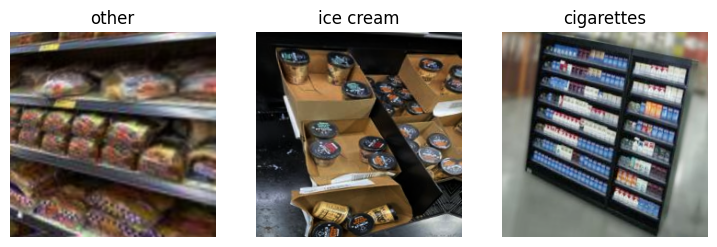

In [5]:
dls_2.show_batch(max_n=3)

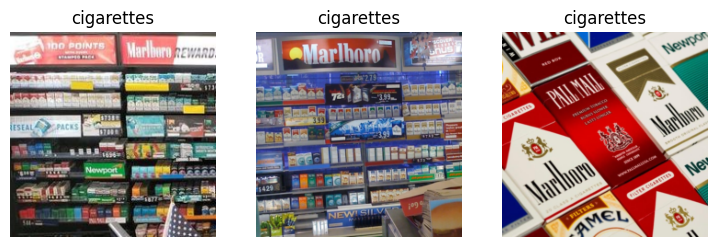

In [6]:
dls_test.show_batch(max_n=3)

### Convnext on Dataset 2 with fastai image augmentation

In [6]:
learn = vision_learner(dls_2, 'convnext_tiny', metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.610852,0.422583,0.867424,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.534920,0.314027,0.893939,00:31
1,0.390187,0.153530,0.939394,00:30
2,0.306240,0.116212,0.969697,00:29
3,0.237980,0.106257,0.977273,00:30


In [7]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.8835)


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.8835
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        50
           1       1.00      0.86      0.92        50
           2       0.85      0.98      0.91        46
           3       0.98      1.00      0.99        50
           4       0.91      0.91      0.91        56
           5       0.95      0.63      0.76        57

    accuracy                           0.88       309
   macro avg       0.90      0.89      0.88       309
weighted avg       0.90      0.88      0.88       309



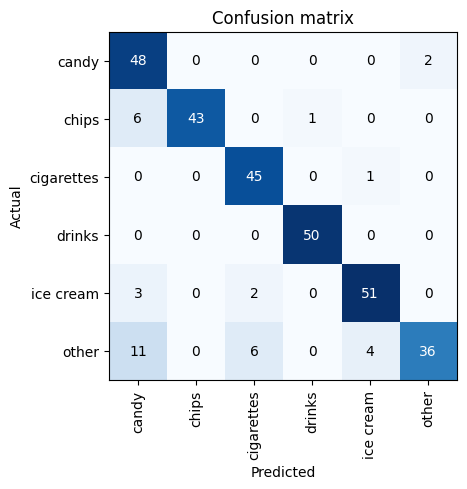

In [9]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

note how extremely confident the model is when it predicts chips and drinks. These both have high precision scores of 1.00 and .98. That makes sense, since those images tended to be the most clean and distinct. Chips and drinks are some of the top selling items of course in the business. There is not much variation in the packaging or presentation of the item. Chips come in a plastic shiny bag and drinks come in standard plastic bottle or 16 ounce can. We would hope that our model is confident in predicting these categories at least...and it is!

### ViT on Dataset 2 with fastai image augmentation

In [3]:
learn = vision_learner(dls_2, 'vit_base_patch16_clip_224', metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.723025,0.453540,0.829545,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.515685,0.209681,0.928030,00:24
1,0.367188,0.098620,0.958333,00:24
2,0.263884,0.080465,0.973485,00:23


In [4]:
preds, y = learn.get_preds(dl=dls_test)
acc = accuracy(preds, y)
print(acc)

TensorBase(0.9450)


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class indices
predicted_classes = preds.argmax(dim=1)

# Convert targets tensor to class indices
true_classes = y

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print(classification_report(true_classes, predicted_classes))

Accuracy: 0.9450
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       1.00      0.92      0.96        50
           2       0.90      1.00      0.95        46
           3       0.96      1.00      0.98        50
           4       1.00      0.98      0.99        56
           5       0.91      0.84      0.87        57

    accuracy                           0.94       309
   macro avg       0.95      0.95      0.95       309
weighted avg       0.95      0.94      0.94       309



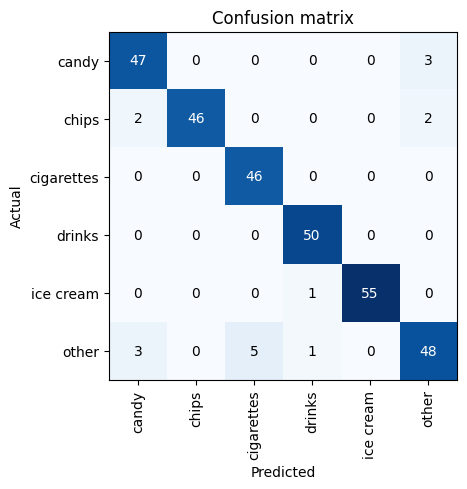

In [6]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test)
interp.plot_confusion_matrix()

# Appendix B: restarting the notebook

Many times when running training neural networks, OutOfMemoryErrors and other peculiarities can occur. This is normal as getting GPUs to run optimally and efficiently can be a challenging task. Sometimes, the best recourse is to simply restart the kernel. This code contains all of the imports and loading of the data into dataloaders and the necessary preproccesing. It is easier to run this one cell instead of rerunning separate cells sequentially.

In [1]:
#gdown is for importing data from Google Drive
!pip install gdown -Uqq

from fastai.vision.all import *
import shutil
from pathlib import Path
import zipfile

#import data
!gdown 1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j

#unzip the file
with zipfile.ZipFile('/kaggle/working/cstore_images_v3.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working')
    
#get all of the image files in `path`
dataset_1_train = Path('dataset1_train')
dataset_2_train = Path('dataset2_train')
dataset_test = Path('dataset_test')
fns1 = get_image_files(dataset_1_train)
fns2 = get_image_files(dataset_2_train)
fns_train = get_image_files(dataset_test)

#display which images files are corrupted 
failed1 = verify_images(fns1)
failed2 = verify_images(fns2)
failed_train = verify_images(fns_train)

# remove the corrupted images
failed1.map(Path.unlink);
failed2.map(Path.unlink);
failed_train.map(Path.unlink)

tst_files = get_image_files("dataset_test")

#DataBlock is an API for customizing the setup of DataLoaders, a class that holds the PyTorch Datasets objects
cstore = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

#pass the path containing the image files to the DataBlock to create DataLoaders
dls_1 = cstore.dataloaders(dataset_1_train)
dls_2 = cstore.dataloaders(dataset_2_train)
dls_test = dls_1.test_dl(tst_files, with_labels=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Downloading...
From (uriginal): https://drive.google.com/uc?id=1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j
From (redirected): https://drive.google.com/uc?id=1ABxqu2vsfyMx941GyLAdCxflIGvnWL2j&confirm=t&uuid=0d0ed56e-519a-4a30-b9c4-149747deb4b0
To: /kaggle/working/cstore_images_v3.zip
100%|████████████████████████████████████████| 556M/556M [00:14<00:00, 38.7MB/s]
